In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data/student_clustering.csv')
df.head()

,cgpa,ML
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


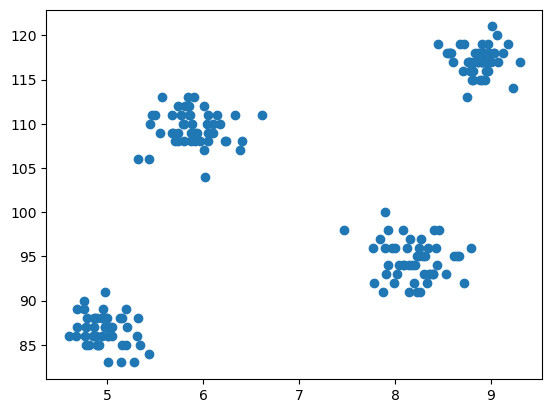

In [3]:
plt.scatter(df['cgpa'],df['ML'])

In [4]:
data = df.to_numpy()

Enter number of cluster (k) : 4
     cgpa   ML  Cluster
0    5.13   88        3
1    5.90  113        2
2    8.36   93        1
3    8.27   97        0
4    5.45  110        2
..    ...  ...      ...
195  4.68   89        3
196  8.57  118        2
197  5.85  112        2
198  6.23  108        2
199  8.82  117        2

[200 rows x 3 columns]


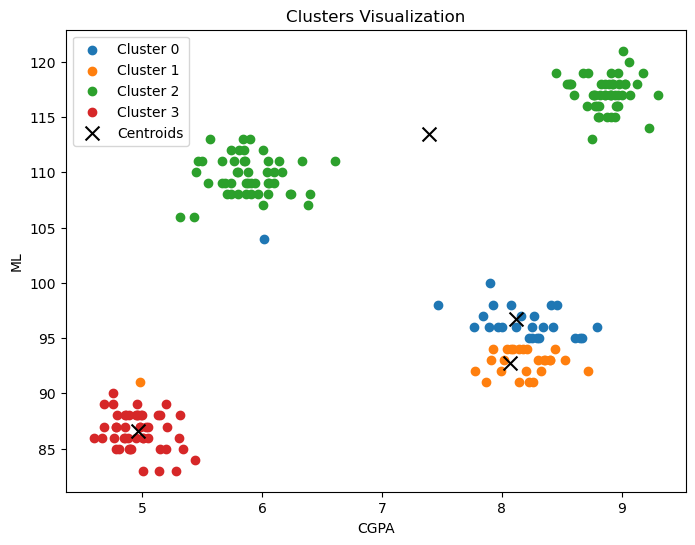

In [5]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans_clustering(data, k,max_iter=500):
    centroids = data[np.random.choice(len(data), k, replace=False)]
    
    while True:
        # Compute distances and assign clusters
        distances = np.array([[euclidean_distance(point, centroid) for centroid in centroids] for point in data])
        clusters = np.argmin(distances, axis=1)

        # Calculate new centroids
        new_centroids = np.array([
            data[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)
        ])
        # Checking the centriod in diff iterations
        if np.allclose(centroids, new_centroids):
            break
        iter_count = 0
        centroids = new_centroids
        iter_count += 1
        if iter_count >= max_iter:
            break
            
    return clusters, centroids
df=pd.read_csv('Data/student_clustering.csv')
data = df.to_numpy()   # Convert df to array
k = int(input("Enter number of cluster (k) : "))

clusters, centroids = kmeans_clustering(data, k)

df['Cluster'] = clusters

print(df)

plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['cgpa'], cluster_data['ML'], label=f'Cluster {i}')

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')

plt.title('Clusters Visualization')
plt.xlabel('CGPA')
plt.ylabel('ML')
plt.legend()
plt.show()


# Using Libraries


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [7]:
df['cluster'] = kmeans.labels_

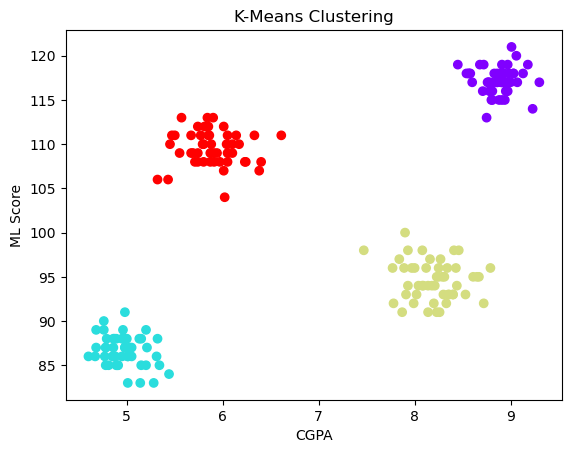

In [8]:
plt.scatter(df['cgpa'], df['ML'], c=df['cluster'], cmap='rainbow')
plt.xlabel('CGPA')
plt.ylabel('ML Score')
plt.title('K-Means Clustering')
plt.show()

[30382.693288000002, 4605.81127, 2604.3783463434343, 702.30966, 519.0432187786499, 400.0698425735217, 309.5469428705562, 254.86793889388676, 211.60745495195624, 187.4281456488516]


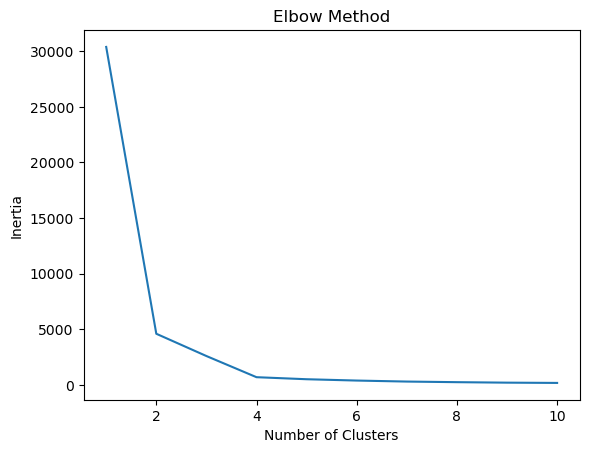

In [33]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    label=kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)
print(wcss)


plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [27]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
print("The optimal number of clusters is:", kl.)


SyntaxError: invalid syntax (621885008.py, line 3)

In [34]:
# Silhouette score

print(f'Silhoutee Score: {(silhouette_score(df,label))}')

Silhoutee Score: 0.5317766561024991
